In [8]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [9]:
def sign(x):
    return (1, -1)[x < 0]

def update_rule(a, w):
    x = np.zeros(len(a))
    for i in range(len(a)):
        for j in range(len(a)):
            x[i] += w[i, j] * a[j]
    x = [sign(a) for a in x]
    return x

In [10]:
# Test convergens patters
def find_attractor(x, w):
    prev = x

    while True:
        curr = update_rule(prev, w)
        if np.array_equal(curr, prev):
            break
        prev = curr
    return prev

In [11]:
def store_patterns():
    data = np.loadtxt('./pict.dat',delimiter=",", dtype=int).reshape(-1,1024)
    return data

In [105]:
def init_weights(patterns):
    dim = patterns.shape[1]
    w=np.zeros((dim,dim))
    
    for i in range(dim):
        for j in range(dim):
            s = 0
            for pattern in patterns:
                s += pattern[i]*pattern[j]
            w[i][j]=(1/(patterns.size)) * s
    #w=0.5*(np.add(w,w.T))
    return w

In [108]:
def recall(pattern,w):
    dim = pattern.size
    count = 0
    energyLevels = []
    
    previousPattern = np.zeros(dim)
    while True:   
        
        s = np.dot(w,pattern)
        s[s >= 0] = 1
        s[s < 0] = -1
                    
        pattern=s
        
        count += 1  
        
        #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
        #plt.show()
        
        solved, ind = check_True(pattern)
        if solved:
            #print ("It took:",count,"nr of iterations")
            #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            #plt.show()
            return ind
            
        elif np.array_equal(pattern,previousPattern):
            #print("Local minimum found in iteration:",count)
            return -1
        previousPattern = np.copy(pattern)

def check_True(predicted_pattern):
    solved = False
    for i in range(3):
        if np.array_equal(data[i],predicted_pattern):
            #print("True! It matched pattern nr:",i)
            solved = True
    return solved, i

In [16]:
def flip(pattern, percentage):
    index = np.arange(pattern.size)
    np.random.shuffle(index)
    
    abso = int(percentage*pattern.size)
    flipIndex = index[:abso]
    
    flipped = np.copy(pattern)
    flipped[flipIndex] = -1*flipped[flipIndex]
    
    #plt.imshow(flipped.reshape(32,32),interpolation="nearest")
    #plt.show()
    
    return flipped
    

In [106]:
data = store_patterns()
w = init_weights(data[:5,:])


0.0009765625


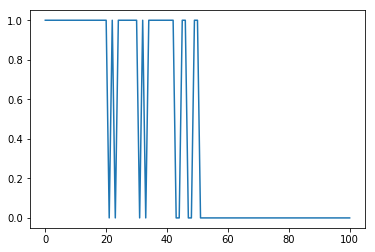

In [36]:
bool_list = []
start_ind = 2
for i in range(0, 101):
    
    x = flip(data[start_ind],i/100)
    ind = recall(x, w)
    if ind == start_ind:
        bool_list.append(True)
    else:
        bool_list.append(False)

plt.plot(range(0,101), bool_list)

In [45]:
def random_patterns(num_pic):
    random_imgs = []
    binar = (1, -1)
    for j in range(num_pic):
        vec = np.zeros(1024)
        for i in range(1024):
            rand_int = np.random.randint(0, 2)
            vec[i] = binar[rand_int]
        random_imgs.append(vec)
    return np.array(random_imgs)
    
    

In [68]:
random_imgs = random_patterns(100)
w_random = init_weights(random_imgs)

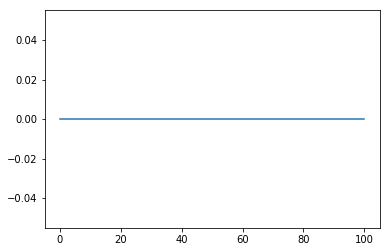

In [49]:
bool_list = []
start_ind = 1
for i in range(0, 101):
    
    x = flip(random_imgs[start_ind],i/100)
    ind = recall(random_imgs[start_ind], w)
    if ind == start_ind:
        bool_list.append(True)
    else:
        bool_list.append(False)

plt.plot(range(0,101), bool_list)

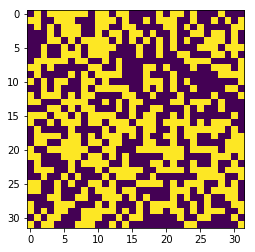

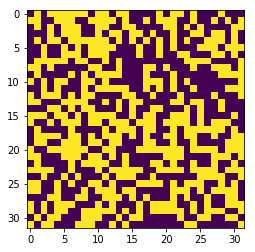

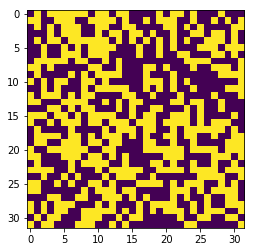

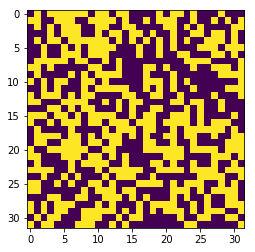

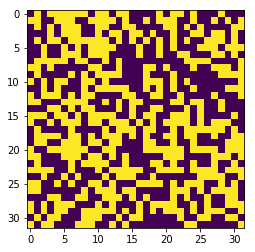

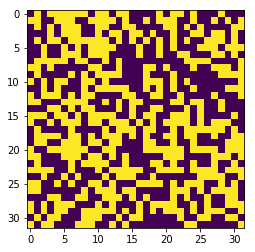

Local minimum found in iteration: 6


In [80]:
x = flip(random_imgs[60],20/100)
ind = recall(x, w_random)

#The difference is that it's not possible to store it
#We can store more random patterns than actually 

In [117]:
def init_weights2(patterns):
    dim = patterns.shape[1] #X x N
    n = patterns.shape[0] #N
    w = np.zeros((dim, dim))
    for i in range(n):
        w+= 1/dim*np.multiply.outer(patterns[i], patterns[i])
        
    return w

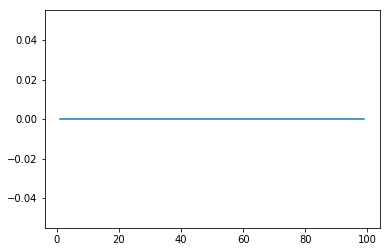

In [122]:
random_imgs = random_patterns(300)
num_stable = []
for i in range(1,100):
    w_large = init_weights2(random_imgs[:i])
    count = 0
    for j in range(len(random_imgs)):
        stable = check_stable(random_imgs[j], w_large)
        if stable:
            count+=1
    num_stable.append(count)

plt.plot(range(1,100), num_stable)

In [112]:
def check_stable(w, pattern):
    
    s = np.dot(w, pattern)
    s[s>=0] = 1
    s[s<0] = -1
    
    if np.array_equal(pattern, s):
        return True
    else:
        return False

In [120]:
w2 = init_weights2(random_imgs[:1])
w1 = init_weights(random_imgs[:1])

np.array_equal(w2, w1)

True

In [119]:
w2

array([[ 0.00976562,  0.00585938,  0.00195312, ...,  0.        ,
         0.        ,  0.00390625],
       [ 0.00585938,  0.00976562, -0.00195312, ...,  0.00390625,
         0.        ,  0.        ],
       [ 0.00195312, -0.00195312,  0.00976562, ...,  0.00390625,
        -0.00390625,  0.00390625],
       ...,
       [ 0.        ,  0.00390625,  0.00390625, ...,  0.00976562,
        -0.00195312, -0.00195312],
       [ 0.        ,  0.        , -0.00390625, ..., -0.00195312,
         0.00976562, -0.00195312],
       [ 0.00390625,  0.        ,  0.00390625, ..., -0.00195312,
        -0.00195312,  0.00976562]])